In [31]:
import pandas as pd
import numpy as np
import string
import spacy
from matplotlib import pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
from nltk import tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob
from textblob import Word
from nltk import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [30]:
# install necessary libraries
!pip install spacy
!pip install wordcloud
!pip install NLTK
!python -m spacy download en
!pip install textblob

2023-10-26 13:43:35.186227: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-26 13:43:35.186316: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-26 13:43:35.186360: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-26 13:43:36.686699: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.7 MB/s eta 0:00:00
✔ Download and installation succe

In [32]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [33]:
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv.crdownload to Elon_musk.csv (1).crdownload


In [34]:
# load the dataset
df=pd.read_csv('/content/Elon_musk.csv (1).crdownload',encoding='Latin-1')


In [35]:
#dropping the unnamed column
df.drop(['Unnamed: 0'],axis = 1, inplace=True)

In [36]:
#read data
df.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [37]:
#renaming our column text as tweets
df.rename({'Text':'tweets'},axis = 1,inplace=True)

In [38]:
df.head()

,tweets
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [39]:
#checking for any blank columns
df.isna().sum()

tweets    0
dtype: int64

In [40]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  444 non-null    object
dtypes: object(1)
memory usage: 3.6+ KB


Data cleaning

Text Preprocessing

In [41]:
#removing leading and trailing characters
df = [tweets.strip() for tweets in df.tweets]
df = [tweets for tweets in df if tweets]
df[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [42]:
#joining the list into one string or text
text = ' '.join(df)
text[0:100]

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you trie'

In [43]:
#remove twitter user handle names  from a given twitter text
tknzr = TweetTokenizer(strip_handles=True)
tweets_token = tknzr.tokenize(text)
tweets_token[0:10]

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with']

In [44]:
#again joining the list
tweets_token_text = ' '.join(tweets_token)
tweets_token_text[0:100]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview'

In [45]:
#removing all puctuation marks
no_punc_text = tweets_token_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[0:100]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  D'

In [46]:
#remove url or https within text
no_url_text = re.sub(r'http\S+','',no_punc_text)
no_url_text[0:100]

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  D'

In [47]:
#tokenization
text_tokens = word_tokenize(no_url_text)
text_tokens[0:10]

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with']

In [48]:
#tokens count
len(text_tokens)

3659

In [49]:
#remove stopwords from corpus
my_stop_words = stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
no_stop_tokens[0:10]

['alien',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'Have',
 'tried',
 'Great',
 'interview']

In [50]:
#normalize the data
lower_words = [Text.lower() for Text in no_stop_tokens]
lower_words[0:10]

['alien',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tried',
 'great',
 'interview']

In [51]:
#stemming (just for understanding purpose and comparison with lemmitization)
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word)for word in lower_words]
stemmed_tokens[0:10]

['alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri',
 'great',
 'interview']

In [52]:
#lemmatization
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(lower_words))
doc[0:10]

alien ray tracing cyberpunk hdr nextlevel have tried great interview

In [53]:
#breaking into lemmas
lemmas = [token.lemma_ for token in doc]
lemmas[0:10]

['alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'try',
 'great',
 'interview']

In [54]:
#joining again all tweets
clean_tweets = ' '.join(lemmas)
clean_tweets[0:500]

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypt'

Feature Extraction

Count Vectorizer



In [55]:
cv = CountVectorizer()
X = cv.fit_transform(lemmas)

In [56]:
print(cv.vocabulary_)

{'alien': 49, 'ray': 793, 'trace': 1042, 'cyberpunk': 215, 'hdr': 433, 'nextlevel': 663, 'have': 430, 'try': 1052, 'great': 408, 'interview': 512, 'doge': 257, 'underestimate': 1104, 'congratulation': 185, 'tesla': 998, 'china': 156, 'amazing': 59, 'execution': 323, 'last': 542, 'year': 1186, 'now': 673, 'next': 662, 'even': 311, 'happy': 426, 'new': 661, 'ox': 707, 'frodo': 372, 'underdoge': 1103, 'all': 50, 'thought': 1015, 'would': 1179, 'fail': 333, 'himself': 452, 'haha': 417, 'thank': 1003, 'indeed': 489, 'tweet': 1056, 'definitely': 231, 'represent': 816, 'realworld': 802, 'time': 1021, 'allocation': 51, 'the': 1005, 'entertaining': 301, 'outcome': 704, 'likely': 561, 'just': 524, 'send': 871, 'agree': 43, 'clubhouse': 163, 'it': 519, 'get': 395, 'real': 800, 'buy': 128, 'dogecoin': 259, 'lil': 562, 'toddler': 1028, 'hodler': 455, 'he': 434, 'issue': 518, 'sentencing': 874, 'seem': 866, 'bit': 112, 'high': 449, 'fix': 356, 'please': 734, 'unlock': 1113, 'account': 28, 'this': 10

In [57]:
print(X.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [58]:
print(X.toarray().shape)

(2352, 1197)


Count Vectorizer with Ngrams


In [59]:
#fitting unigram,bigram and trigram
cv_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas)

In [60]:

print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [61]:
#fitting our term frequency- inverse document frequency vectorizer
tfidfv_ngram_max_feat = TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram = tfidfv_ngram_max_feat.fit_transform(lemmas)

In [62]:

print(tfidf_matrix_ngram.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [63]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis("off");

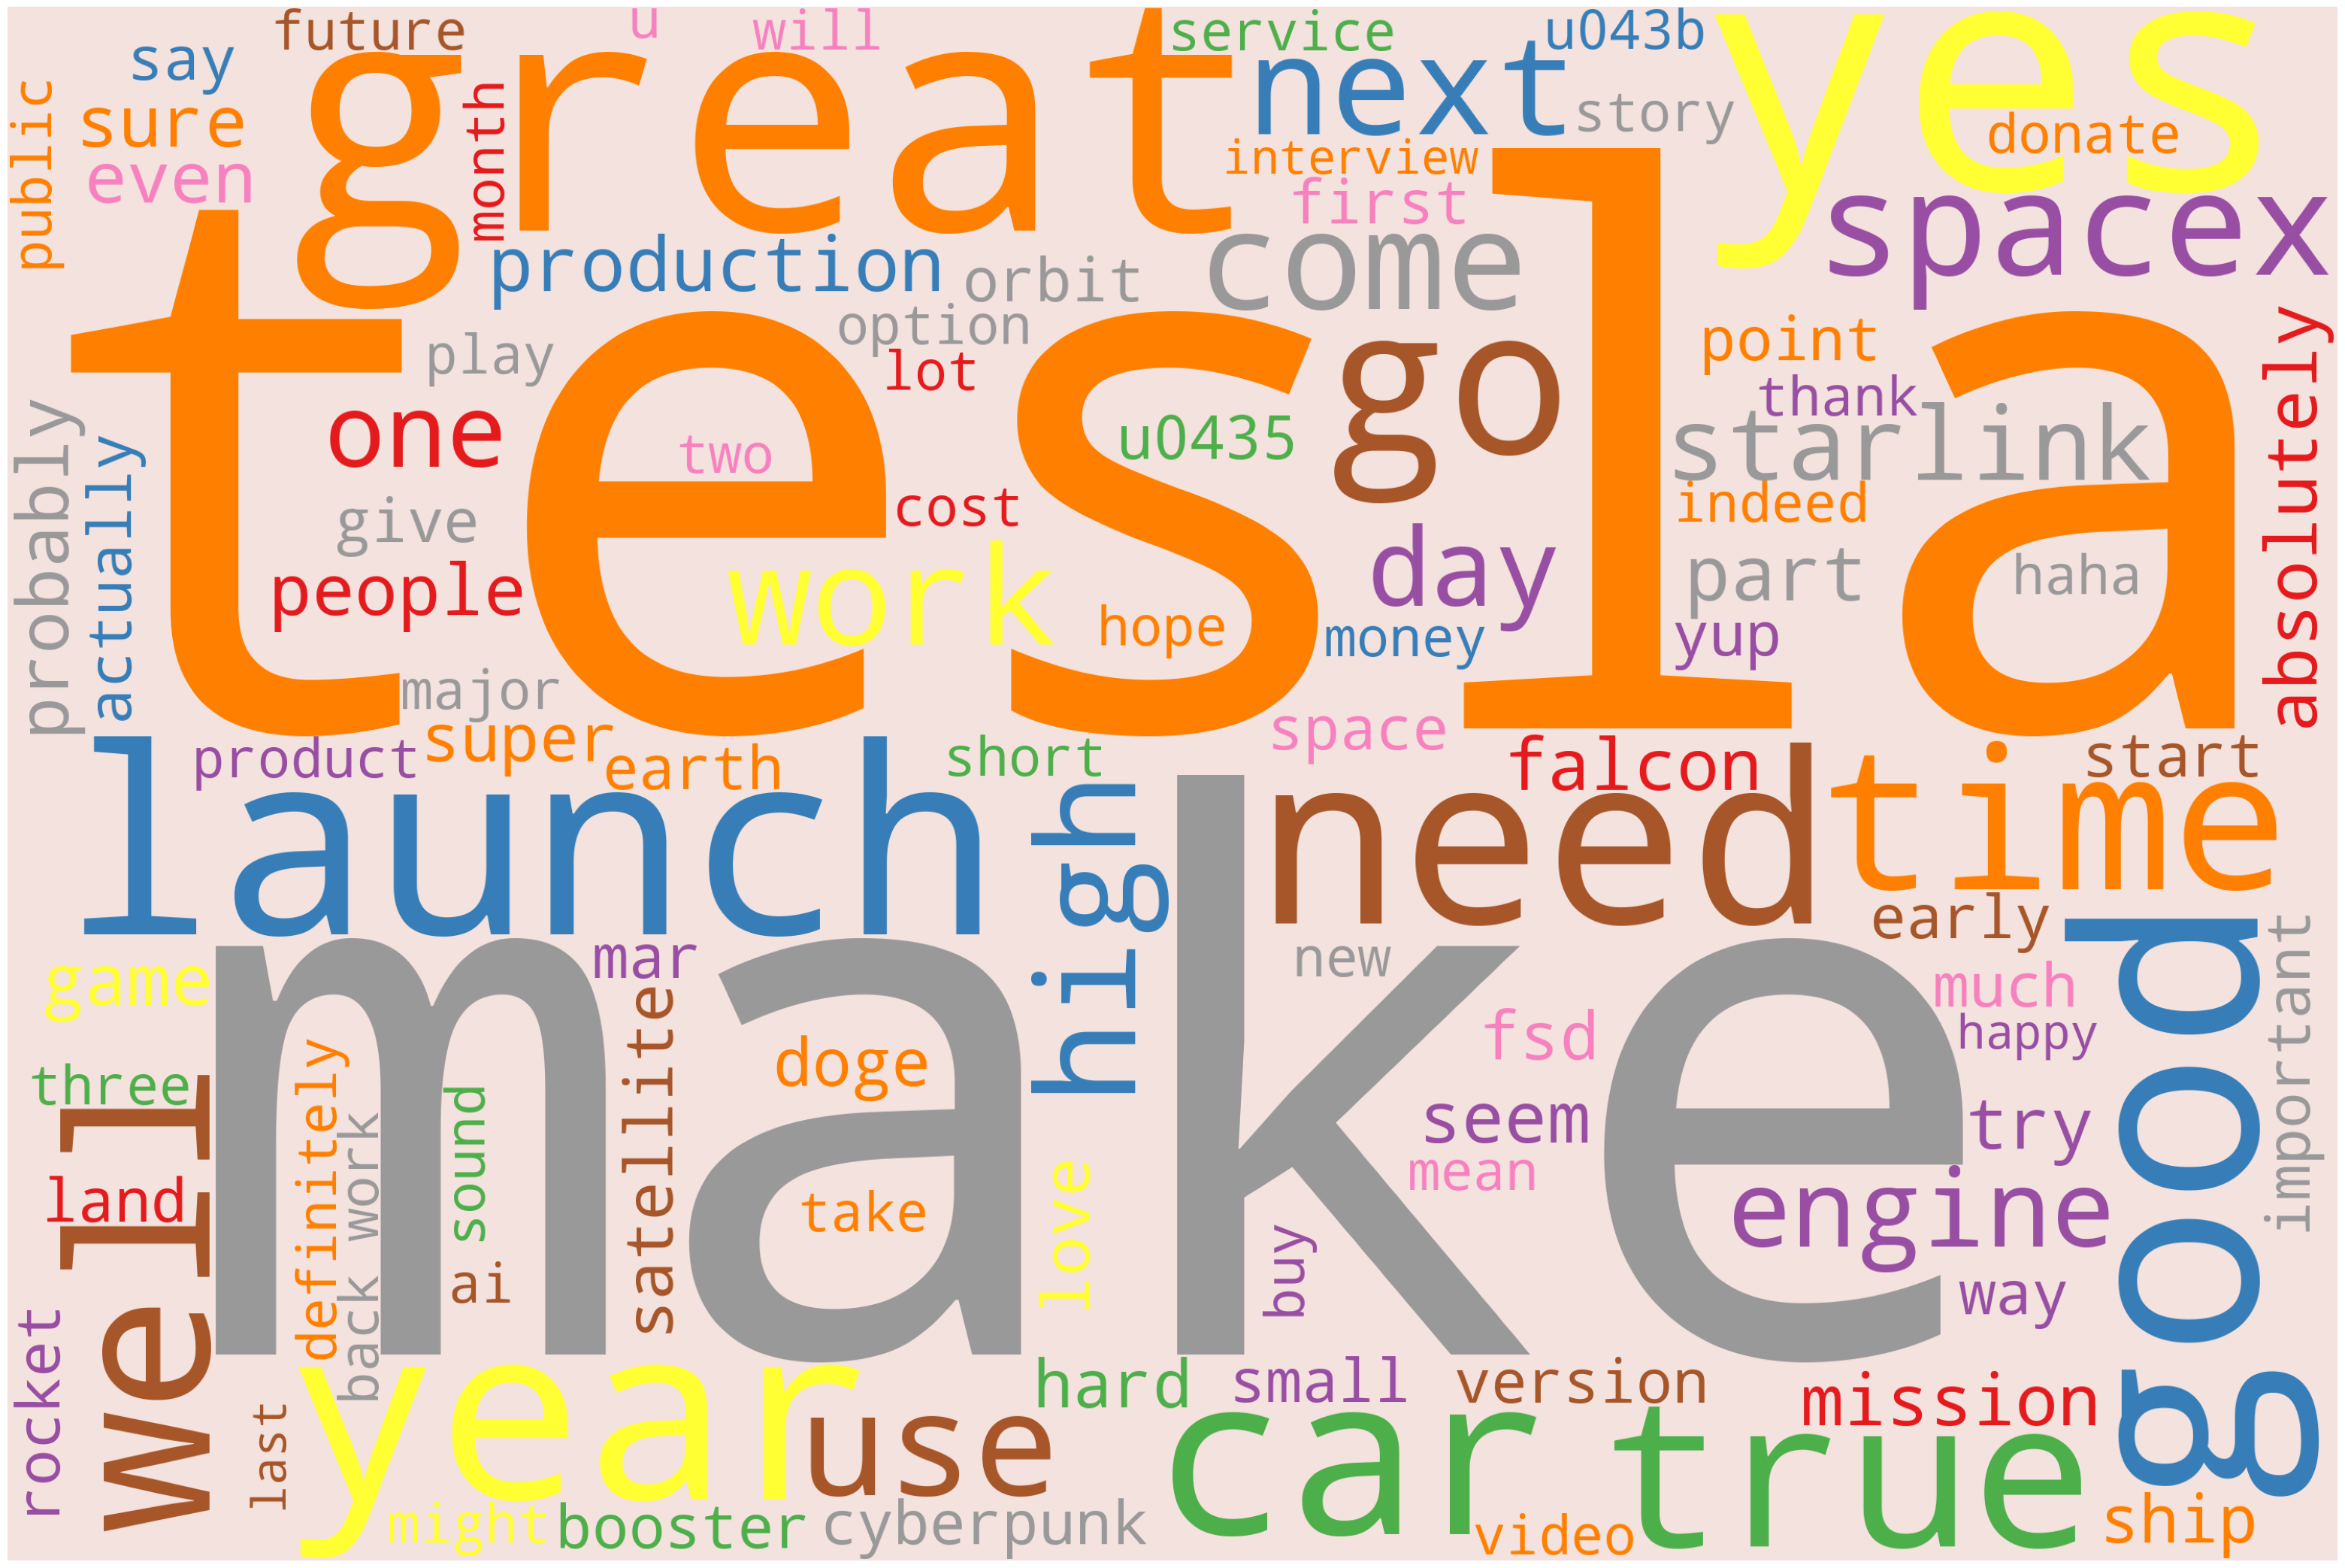

In [64]:
stopwords = STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')

wordcloud = WordCloud(width= 3000, height= 2000,background_color='#F4E2DE',max_words=100,
                     colormap='Set1',stopwords=STOPWORDS,contour_color='black',contour_width=2).generate(clean_tweets)
plot_cloud(wordcloud)

In [65]:
nlp = spacy.load('en_core_web_sm')
one_block = clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style = 'ent',jupyter=True)

In [66]:
#printing position of words
for token in doc_block[0:20]:
    print(token,token.pos_)

alien PROPN
ray PROPN
trace NOUN
cyberpunk NOUN
hdr NOUN
nextlevel NOUN
have AUX
try VERB
great ADJ
interview NOUN
doge ADJ
underestimate ADJ
congratulation NOUN
tesla NOUN
china PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV


In [67]:
#filtering only nouns , verbs and Adjectives only
nouns_verbs_adj = [token.text for token in doc_block if token.pos_ in('NOUN','VERB','ADJECTIVE')]
print(nouns_verbs_adj[100:200])

['time', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'mass', 'back', 'work', 'tonight', 'video', 'people', 'speak', 'cute', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'doge', 'rainforest', 'come', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'tesla', 'read', 'kingdom', 'hear', 'name', 'year', 'dogecake', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'scratch', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'raptor', 'launch', 'mission', 'collect', 'datum', 'galaxy', 'explore', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'min', 'throttle', 'point', 'risk', 'start', 'engine', 'shut']


In [68]:
#counting nouns,verbs and adjectives

cv = CountVectorizer()
X2 = cv.fit_transform(nouns_verbs_adj)
sum_words = X2.sum(axis = 0)

words_freq = [(word,sum_words[0,idx])for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq,key = lambda x: x[1],reverse = True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:11] #viewing top 10 verbs.nouns and adjectives

,word,count
0,make,22
1,tesla,18
2,launch,17
3,year,16
4,work,13
5,need,13
6,car,13
7,go,11
8,time,9
9,get,9


<Axes: title={'center': 'top 10 verbs,adjectives and nouns'}, xlabel='word'>

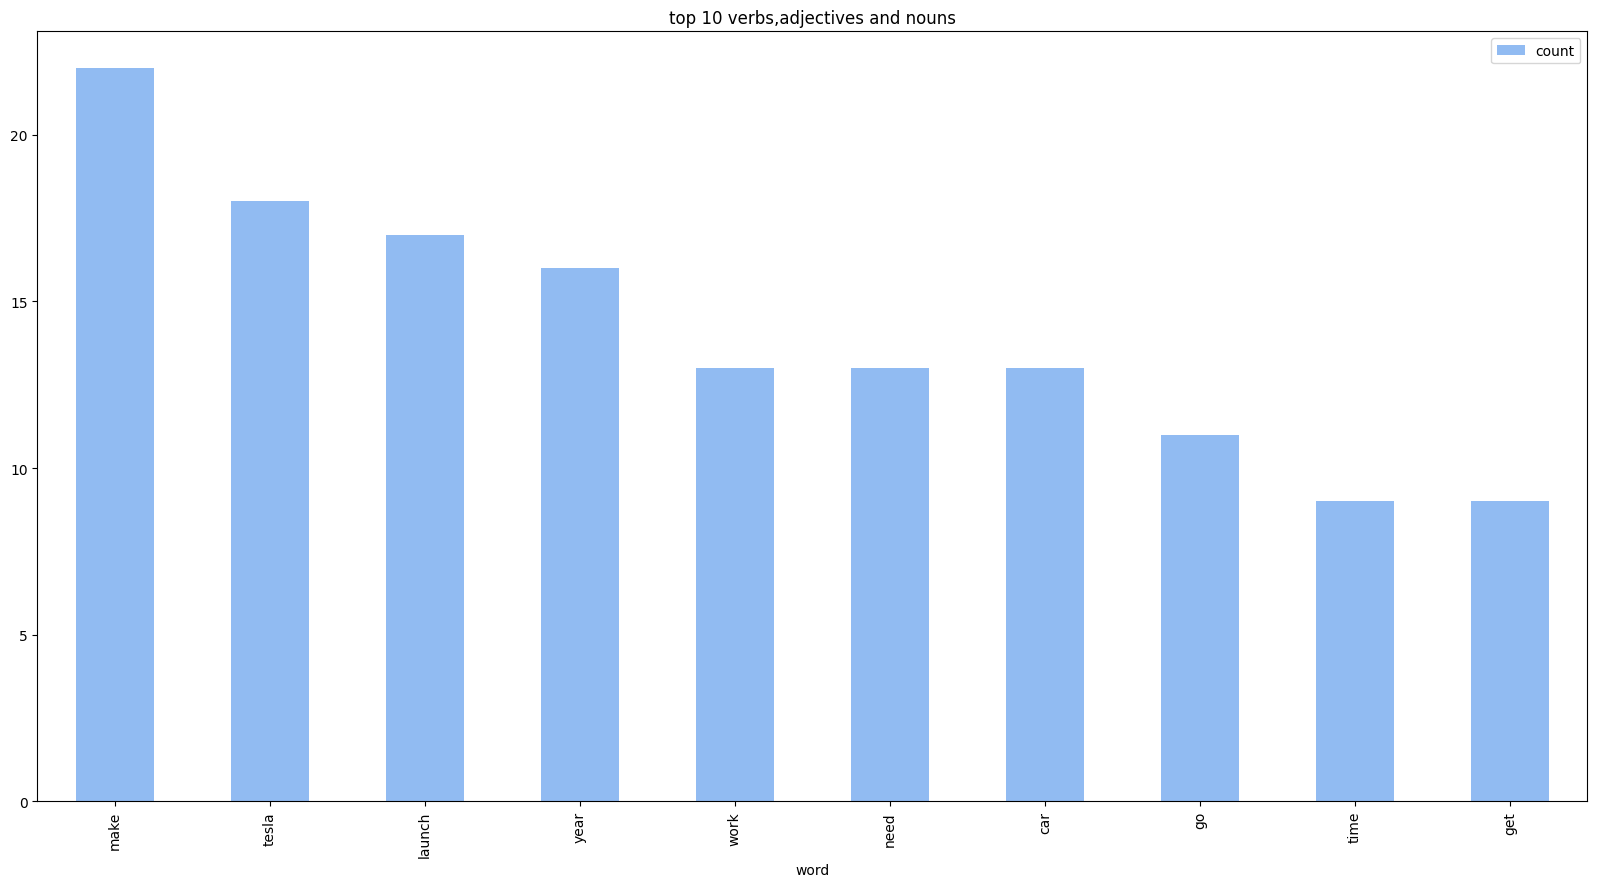

In [69]:
#visualizing our results on barplot
wd_df[0:10].plot.bar(x = 'word',figsize =(20,10),title = 'top 10 verbs,adjectives and nouns',color = '#91BBF2')

In [70]:
#breaking tweets into sentences
sentences = tokenize.sent_tokenize(' '.join(df))
sentences[0:10]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [71]:
#storing sentences into dataframe
sent_df = pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
171,RT @SpaceX: Photos from yesterdays launch and...
172,<U+2665><U+FE0F> i love all u crazy ppl out th...
173,The main value of college used to be hanging o...
174,We will release FSD subscription early next year.


In [72]:
#calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')


def calculate_sentiment(text:str= None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)

        return sent_score
